In [73]:
import tensorflow as tf
sess = tf.InteractiveSession()
reader = tf.TFRecordReader()


In [74]:
# filename_queue = tf.train.string_input_producer(['./datasets/square_room_100steps_2.2m_1000000/0000-of-0099.tfrecord'])
filename_queue = tf.train.string_input_producer(['./example1.tfrecord'])

In [75]:
_, serialized_example = reader.read(filename_queue)

feature_map = {
        'init_pos':
            tf.FixedLenFeature(shape=[2], dtype=tf.float32),
        'init_hd':
            tf.FixedLenFeature(shape=[1], dtype=tf.float32),
        'ego_vel':
            tf.FixedLenFeature(
                shape=[100, 3],
                dtype=tf.float32),
        'target_pos':
            tf.FixedLenFeature(
                shape=[100, 2],
                dtype=tf.float32),
        'target_hd':
            tf.FixedLenFeature(
                shape=[100, 1],
                dtype=tf.float32),
    }

read_data = tf.parse_single_example(serialized=serialized_example,
                                    features=feature_map)

tf.train.start_queue_runners(sess)

# Print features
for name, tensor in read_data.items():
    print('{}: {}'.format(name, tensor.eval()))

target_pos: [[ 0.16789106  0.0397125 ]
 [ 0.17730418  0.06788748]
 [ 0.18118468  0.08794076]
 [ 0.17628641  0.10716452]
 [ 0.16687028  0.13080056]
 [ 0.15133652  0.1492285 ]
 [ 0.13064611  0.16751076]
 [ 0.1099921   0.1797836 ]
 [ 0.08864851  0.1918129 ]
 [ 0.06653202  0.20033191]
 [ 0.0509055   0.19938189]
 [ 0.03569192  0.18910807]
 [ 0.01652917  0.17823593]
 [-0.00150753  0.17540517]
 [-0.01799637  0.17148489]
 [-0.04065638  0.16649796]
 [-0.06598745  0.1648785 ]
 [-0.08325773  0.16980955]
 [-0.10907358  0.17440842]
 [-0.13036852  0.17724015]
 [-0.15194525  0.19276001]
 [-0.17616162  0.20708695]
 [-0.19382176  0.21443062]
 [-0.21773294  0.2244129 ]
 [-0.23798586  0.23841207]
 [-0.25026584  0.25296351]
 [-0.26049852  0.26624751]
 [-0.26850599  0.2823551 ]
 [-0.28137031  0.30331463]
 [-0.28908867  0.32190934]
 [-0.29064542  0.34645382]
 [-0.29314369  0.36233377]
 [-0.28895232  0.39396751]
 [-0.29191801  0.41702205]
 [-0.29882398  0.44097596]
 [-0.31133732  0.46339181]
 [-0.32495701  0

In [76]:
read_data['target_pos'][:,0].eval()

array([-0.17160062, -0.16244636, -0.15821284, -0.1641849 , -0.16471101,
       -0.17062843, -0.17133029, -0.17155679, -0.17184208, -0.17876536,
       -0.19547674, -0.21283603, -0.2256929 , -0.24282892, -0.25904962,
       -0.28215125, -0.30966181, -0.33541924, -0.35333151, -0.37279519,
       -0.39492521, -0.41110572, -0.43669641, -0.4525272 , -0.47079983,
       -0.47213516, -0.48205933, -0.50336748, -0.52002811, -0.54052699,
       -0.56658524, -0.58640081, -0.60685253, -0.62643248, -0.64322537,
       -0.6581763 , -0.65652871, -0.64224541, -0.62879515, -0.6112954 ,
       -0.59258038, -0.57409555, -0.55598348, -0.53933108, -0.51950413,
       -0.50969833, -0.50135624, -0.50126737, -0.49905571, -0.49087292,
       -0.48253179, -0.46288931, -0.4497551 , -0.43154129, -0.40728655,
       -0.38462624, -0.36090463, -0.34236431, -0.31847057, -0.3046087 ,
       -0.29466343, -0.28204045, -0.26834753, -0.25575718, -0.24083748,
       -0.22793901, -0.21558861, -0.18750502, -0.15820356, -0.13

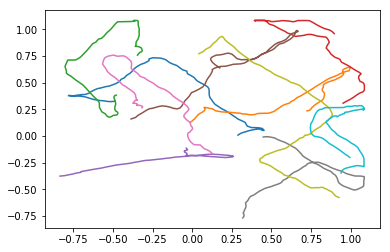

In [80]:
for _ in range(10):
    read_data = tf.parse_single_example(serialized=serialized_example,
                                        features=feature_map)

    tf.train.start_queue_runners(sess)
    plt.plot(read_data['target_pos'][:,0].eval(), read_data['target_pos'][:,1].eval())

In [78]:
import numpy as np
target_pos = read_data['target_pos'].eval()
path_length = 0
for i in range(99):
    path_length += np.sqrt(np.abs(target_pos[:,0][i]-target_pos[:,0][i+1])**2 + np.abs(target_pos[:,1][i]-target_pos[:,1][i+1])**2)
path_length

1.9987786546592783

In [37]:
path_length

2.1215554925221793

In [24]:
_, raw_data = reader.read_up_to(filename_queue, num_records=64)

In [19]:
example = tf.parse_example(serialized=raw_data, features=feature_map)
batch = [
    example['init_pos'], example['init_hd'],
    example['ego_vel'][:, :100, :],
    example['target_pos'][:, :100, :],
    example['target_hd'][:, :100, :]
]

In [20]:
nest = tf.contrib.framework.nest


In [21]:
# tf.train.start_queue_runners(sess)

dtypes = nest.map_structure(lambda x: x.dtype, batch)
shapes = nest.map_structure(lambda x: x.shape[1:], batch)

In [22]:
_queue = tf.RandomShuffleQueue(
          capacity=256,
          min_after_dequeue=128,
          dtypes=dtypes,
          shapes=shapes,
          seed=1)


In [23]:
in_pos, in_hd, ego_vel, target_pos, target_hd = _queue.dequeue()

In [24]:
import dataset_reader 
import tensorflow as tf

# Task config
tf.flags.DEFINE_string('task_dataset_info', 'square_room',
                       'Name of the room in which the experiment is performed.')
tf.flags.DEFINE_string('task_root',
                       None,
                       'Dataset path.')
tf.flags.DEFINE_float('task_env_size', 2.2,
                      'Environment size (meters).')
tf.flags.DEFINE_list('task_n_pc', [256],
                     'Number of target place cells.')
tf.flags.DEFINE_list('task_pc_scale', [0.01],
                     'Place cell standard deviation parameter (meters).')
tf.flags.DEFINE_list('task_n_hdc', [12],
                     'Number of target head direction cells.')
tf.flags.DEFINE_list('task_hdc_concentration', [20.],
                     'Head direction concentration parameter.')
tf.flags.DEFINE_integer('task_neurons_seed', 8341,
                        'Seeds.')
tf.flags.DEFINE_string('task_targets_type', 'softmax',
                       'Type of target, soft or hard.')
tf.flags.DEFINE_string('task_lstm_init_type', 'softmax',
                       'Type of LSTM initialisation, soft or hard.')
tf.flags.DEFINE_bool('task_velocity_inputs', True,
                     'Input velocity.')
tf.flags.DEFINE_list('task_velocity_noise', [0.0, 0.0, 0.0],
                     'Add noise to velocity.')

# Model config
tf.flags.DEFINE_integer('model_nh_lstm', 128, 'Number of hidden units in LSTM.')
tf.flags.DEFINE_integer('model_nh_bottleneck', 256,
                        'Number of hidden units in linear bottleneck.')
tf.flags.DEFINE_list('model_dropout_rates', [0.5],
                     'List of floats with dropout rates.')
tf.flags.DEFINE_float('model_weight_decay', 1e-5,
                      'Weight decay regularisation')
tf.flags.DEFINE_bool('model_bottleneck_has_bias', False,
                     'Whether to include a bias in linear bottleneck')
tf.flags.DEFINE_float('model_init_weight_disp', 0.0,
                      'Initial weight displacement.')

# Training config
tf.flags.DEFINE_integer('training_epochs', 1000, 'Number of training epochs.')
tf.flags.DEFINE_integer('training_steps_per_epoch', 1000,
                        'Number of optimization steps per epoch.')
tf.flags.DEFINE_integer('training_minibatch_size', 100,
                        'Size of the training minibatch.')
tf.flags.DEFINE_integer('training_evaluation_minibatch_size', 4000,
                        'Size of the minibatch during evaluation.')
tf.flags.DEFINE_string('training_clipping_function', 'utils.clip_all_gradients',
                       'Function for gradient clipping.')
tf.flags.DEFINE_float('training_clipping', 1e-5,
                      'The absolute value to clip by.')

tf.flags.DEFINE_string('training_optimizer_class', 'tf.train.RMSPropOptimizer',
                       'The optimizer used for training.')
tf.flags.DEFINE_string('training_optimizer_options',
                       '{"learning_rate": 1e-5, "momentum": 0.9}',
                       'Defines a dict with opts passed to the optimizer.')

# Store
tf.flags.DEFINE_string('saver_results_directory',
                       None,
                       'Path to directory for saving results.')
tf.flags.DEFINE_integer('saver_eval_time', 20,
                        'Frequency at which results are saved.')

# Require flags
tf.flags.mark_flag_as_required('task_root')
tf.flags.mark_flag_as_required('saver_results_directory')
FLAGS = tf.flags.FLAGS


In [25]:
data_reader = dataset_reader.DataReader(
      'square_room', root='./datasets', num_threads=4)

In [26]:
train_traj = data_reader.read(batch_size=10)

In [27]:
train_traj

(<tf.Tensor 'random_shuffle_queue_2_DequeueMany:0' shape=(10, 2) dtype=float32>,
 <tf.Tensor 'random_shuffle_queue_2_DequeueMany:1' shape=(10, 1) dtype=float32>,
 <tf.Tensor 'random_shuffle_queue_2_DequeueMany:2' shape=(10, 100, 3) dtype=float32>,
 <tf.Tensor 'random_shuffle_queue_2_DequeueMany:3' shape=(10, 100, 2) dtype=float32>,
 <tf.Tensor 'random_shuffle_queue_2_DequeueMany:4' shape=(10, 100, 1) dtype=float32>)

In [29]:
init_pos, init_hd, ego_vel, target_pos, target_hd = train_traj

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    label_numpy = init_pos.eval()

In [31]:
init_pos.numpy()

AttributeError: 'Tensor' object has no attribute 'numpy'

In [ ]:
 print(type(tf.Session().run(init_pos)))